# Data Preprocess（Deal with Abnormal Value!）Then we combine the mean of each person's 25 input features into one CSV

[0.18858279 0.11949531 0.12518589 0.12895935 0.14342386 0.363328
 0.11842229 0.14187851 0.21587398 0.1388137  1.         0.16672681
 0.         0.14523717 0.04492578 0.14357388 0.19433764 0.72226169
 0.78441488 0.85256438 0.71143686 0.80040886 0.55875659 0.61873682
 0.39500522]


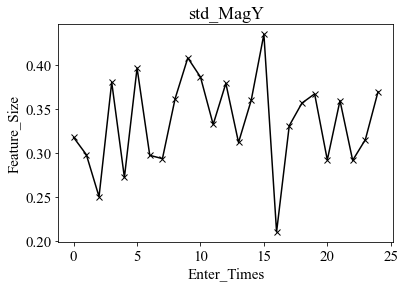

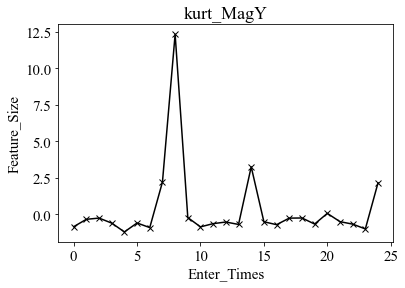

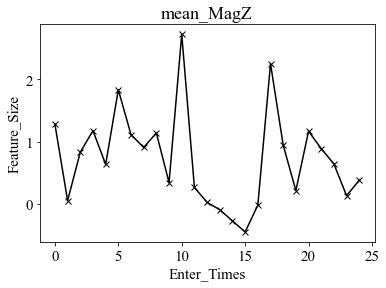

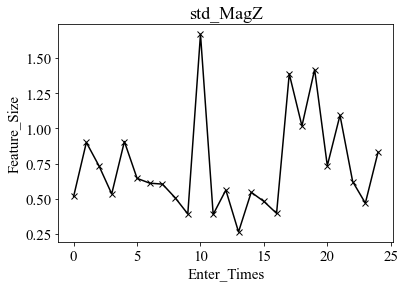

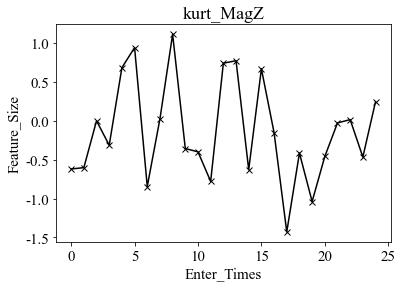

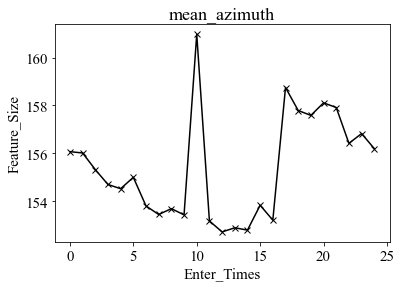

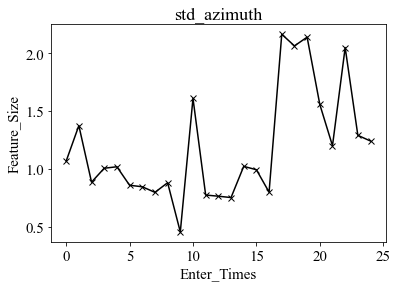

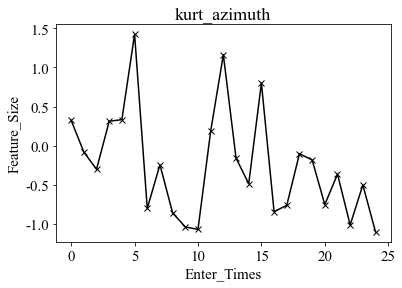

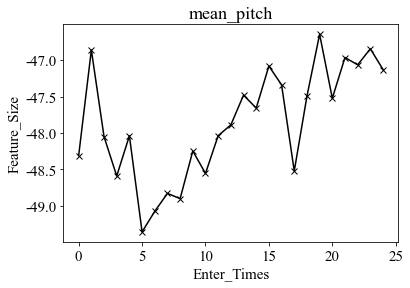

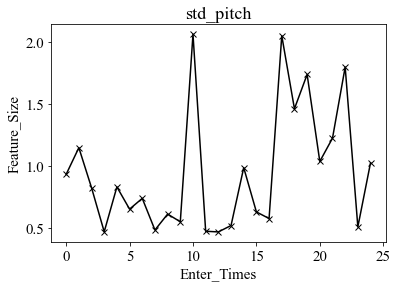

In [25]:
#预处理前同一用户多次输入的不稳定性
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
ori_data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/儿童/儿童用户16/密码3_儿童用户16.csv',index_col=0)
feature_columns=ori_data.columns
# print(ori_data)
normalize=MinMaxScaler()
new_data=normalize.fit_transform(ori_data)
print(new_data[:,0])
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size']=15
#62列和65列个别坏值
for i in range(80,100,2):#抽取10列
    plt.figure(i)
    plt.plot(ori_data.iloc[:,i],marker='x',c='k')
    plt.xlabel('Enter_Times')
    plt.ylabel('Feature_Size')
    plt.title(feature_columns[i])
    plt.show()

In [23]:

import pandas as pd
import numpy as np
import os
import glob
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
detector=IsolationForest(contamination=0.2)
norm=MinMaxScaler()
feature_columns=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/成人/成人用户1/密码2_成人用户1.csv',index_col=0).columns
All_user=glob.glob(os.path.join('D:/Lehigh/bussiness/final project/第二次提取特征/成人','*'))
user_seq=0
Feature_All_mean_1=pd.DataFrame()
Feature_All_mean_2=pd.DataFrame()
Feature_All_mean_3=pd.DataFrame()
Feature_All_mean_4=pd.DataFrame()
for user in All_user:
    user_file=glob.glob(os.path.join(user,'*.csv'))
    user_seq+=1
    print('正在处理第{}个用户的特征数据'.format(user_seq))
    for single_file in user_file:
        ori_data_0=pd.read_csv(single_file,index_col=0)
        Ori_data=np.array(ori_data_0)
        detector.fit(Ori_data)
        predict=detector.predict(Ori_data)
        data_dect=np.delete(Ori_data,predict==-1,axis=0)
        # print(data_dect)
        df_med=pd.DataFrame(data=data_dect).mean()
        df_med_2=pd.DataFrame(df_med).T
        df_med_2=pd.DataFrame(data=df_med_2)
        df_med_2.columns=feature_columns
        if '密码1' in single_file:
            print('密码1处理中')
            Feature_All_mean_1=pd.concat([Feature_All_mean_1,df_med_2],axis=0,ignore_index=True)
        elif '密码2' in single_file:
            print( '密码2处理中' )
            Feature_All_mean_2 = pd.concat( [Feature_All_mean_2,df_med_2],axis=0,ignore_index=True )
        elif '密码3' in single_file:
            print( '密码3处理中' )
            Feature_All_mean_3 = pd.concat( [Feature_All_mean_3,df_med_2],axis=0,ignore_index=True )
        elif '密码4' in single_file:
            print( '密码4处理中' )
            Feature_All_mean_4 = pd.concat( [Feature_All_mean_4,df_med_2],axis=0,ignore_index=True )
    print('第{}个用户特征处理结束'.format(user_seq))

All_user=glob.glob(os.path.join('D:/Lehigh/bussiness/final project/第二次提取特征/儿童','*'))
user_seq=0
Feature0_All_mean_1=pd.DataFrame()
Feature0_All_mean_2=pd.DataFrame()
Feature0_All_mean_3=pd.DataFrame()
Feature0_All_mean_4=pd.DataFrame()
for user in All_user:
    user_file=glob.glob(os.path.join(user,'*.csv'))
    user_seq+=1
    print('正在处理第{}个用户的特征数据'.format(user_seq))
    for single_file in user_file:
        ori_data_0=pd.read_csv(single_file,index_col=0)
        Ori_data=np.array(ori_data_0)
        detector.fit(Ori_data)
        predict=detector.predict(Ori_data)
        data_dect=np.delete(Ori_data,predict==-1,axis=0)
        # print(data_dect)
        df_med=pd.DataFrame(data=data_dect).mean()
        df_med_2=pd.DataFrame(df_med).T
        df_med_2=pd.DataFrame(data=df_med_2)
        df_med_2.columns=feature_columns
        if '密码1' in single_file:
            print('密码1处理中')
            Feature0_All_mean_1=pd.concat([Feature0_All_mean_1,df_med_2],axis=0,ignore_index=True)
        elif '密码2' in single_file:
            print( '密码2处理中' )
            Feature0_All_mean_2 = pd.concat( [Feature0_All_mean_2,df_med_2],axis=0,ignore_index=True )
        elif '密码3' in single_file:
            print( '密码3处理中' )
            Feature0_All_mean_3 = pd.concat( [Feature0_All_mean_3,df_med_2],axis=0,ignore_index=True )
        elif '密码4' in single_file:
            print( '密码4处理中' )
            Feature0_All_mean_4 = pd.concat( [Feature0_All_mean_4,df_med_2],axis=0,ignore_index=True )
    print('第{}个用户特征处理结束'.format(user_seq))
    
Feature_All_mean_1 = pd.concat( [Feature_All_mean_1,Feature0_All_mean_1],axis=0,ignore_index=True )
Feature_All_mean_2 = pd.concat( [Feature_All_mean_2,Feature0_All_mean_2],axis=0,ignore_index=True )
Feature_All_mean_3 = pd.concat( [Feature_All_mean_3,Feature0_All_mean_3],axis=0,ignore_index=True )
Feature_All_mean_4 = pd.concat( [Feature_All_mean_4,Feature0_All_mean_1],axis=0,ignore_index=True )

Feature_All_mean_1.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码1联合.csv')
Feature_All_mean_2.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码2联合.csv')
Feature_All_mean_3.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码3联合.csv')
Feature_All_mean_4.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码4联合.csv')

正在处理第1个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第1个用户特征处理结束
正在处理第2个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第2个用户特征处理结束
正在处理第3个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第3个用户特征处理结束
正在处理第4个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第4个用户特征处理结束
正在处理第5个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第5个用户特征处理结束
正在处理第6个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第6个用户特征处理结束
正在处理第7个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第7个用户特征处理结束
正在处理第8个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第8个用户特征处理结束
正在处理第9个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第9个用户特征处理结束
正在处理第10个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第10个用户特征处理结束
正在处理第11个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第11个用户特征处理结束
正在处理第12个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第12个用户特征处理结束
正在处理第13个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第13个用户特征处理结束
正在处理第14个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第14个用户特征处理结束
正在处理第15个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第15个用户特征处理结束
正在处理第16个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第16个用户特征处理结束
正在处理第17个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第17个用户特征处理结束
正在处理第18个用户的特征数据
密码1处理中
密码2处理中
密码3处理中
密码4处理中
第18个用

# Standardize the obtained data

In [26]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码1联合.csv',index_col=0)
ori_data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码1联合.csv',index_col=0)

data.drop(columns='Identity',inplace=True)

standard=StandardScaler()
standard.fit(data)
new_data_2=standard.transform(data)
new_data_2=pd.DataFrame(data=new_data_2,columns=data.columns)

new_data_2['Identity']=ori_data['Identity']
#print(new_data_2)
new_data_2.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码1_标准化.csv')


#密码2
data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码2联合.csv',index_col=0)
ori_data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码2联合.csv',index_col=0)
# norm=MinMaxScaler()
data.drop(columns='Identity',inplace=True)
# norm.fit(data)
standard=StandardScaler()
standard.fit(data)
new_data_2=standard.transform(data)
new_data_2=pd.DataFrame(data=new_data_2,columns=data.columns)
# print(new_data_2)
new_data_2['Identity']=ori_data['Identity']
#print(new_data_2)

new_data_2.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码2_标准化.csv')


#密码3
data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码3联合.csv',index_col=0)
ori_data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码3联合.csv',index_col=0)
# norm=MinMaxScaler()
data.drop(columns='Identity',inplace=True)
# norm.fit(data)
standard=StandardScaler()
standard.fit(data)
new_data_2=standard.transform(data)
new_data_2=pd.DataFrame(data=new_data_2,columns=data.columns)
# print(new_data_2)
new_data_2['Identity']=ori_data['Identity']
#print(new_data_2)

new_data_2.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码3_标准化.csv')



#密码4
data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码4联合.csv',index_col=0)
ori_data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/25次联合/密码4联合.csv',index_col=0)
# norm=MinMaxScaler()
data.drop(columns='Identity',inplace=True)
# norm.fit(data)
standard=StandardScaler()
standard.fit(data)
new_data_2=standard.transform(data)
new_data_2=pd.DataFrame(data=new_data_2,columns=data.columns)
# print(new_data_2)
new_data_2['Identity']=ori_data['Identity']
#print(new_data_2)

new_data_2.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码4_标准化.csv')

# Compare Different Variables

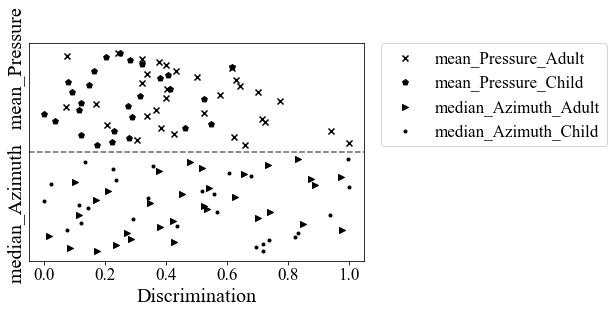

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
data=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码4_标准化.csv',index_col=0)
feature_columns=data.columns
# print(ori_data)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size']=17
data=norm.fit_transform(data)
data=pd.DataFrame(data=data,columns=feature_columns)


plt.figure( )
Adult_value = data['mean_Pressure'][0:32]
Child_value = data['mean_Pressure'][32:59]
Adult_value_1 = data['median_azimuth'][0:32]
Child_value_1 = data['median_azimuth'][32:59]
X_Adult = np.linspace( 17,31,Adult_value.shape[ 0 ] )
X_Child = np.linspace( 17,31,Child_value.shape[ 0 ] )
X_Adult_1 = np.linspace( 1,15,Adult_value_1.shape[ 0 ] )
X_Child_1 = np.linspace( 1,15,Child_value_1.shape[ 0 ] )
plt.scatter( Adult_value,X_Adult,c='k',marker='x',alpha=1 )
plt.scatter( Child_value,X_Child,c='k',marker='p',alpha=1 )
plt.scatter(Adult_value_1,X_Adult_1,c='k',marker='>',alpha=1 )
plt.scatter( Child_value_1,X_Child_1,c='k',marker='.',alpha=1 )
# plt.xticks( [ ] )
plt.yticks([])
plt.ylabel('   median_Azimuth   mean_Pressure',fontdict={'size': 20})
plt.xlabel( 'Discrimination' ,fontdict={'size': 20})
plt.legend(['mean_Pressure_Adult', 'mean_Pressure_Child','median_Azimuth_Adult','median_Azimuth_Child'],loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.axhline( y=16,color='k',alpha=0.6,linestyle='--' )
plt.show()


# Use PCA to Reduce Dimension of Data !

pca.components_ (59, 156)
pca_var_ratio (59,)


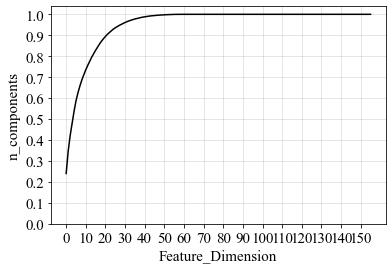

In [5]:
#确定PCA维度
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码3_标准化.csv',index_col=0)
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
pca=PCA()
pca.fit(x,y)
ratio=pca.explained_variance_ratio_
print("pca.components_",pca.components_.shape)
print("pca_var_ratio",pca.explained_variance_ratio_.shape)
# 绘制图形
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size']=15
plt.plot([ i for i in range(x.shape[ 1 ]) ],[ np.sum(ratio[ :i + 1 ]) for i in range(x.shape[ 1 ]) ],c='k')
plt.xticks(np.arange(x.shape[ 1 ],step=10))
plt.yticks(np.arange(0,1.01,0.1))
plt.ylabel('n_components')
plt.xlabel('Feature_Dimension')
plt.grid(alpha=0.4)
plt.show()

In [7]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import joblib
df=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码1_标准化.csv',index_col=0)
print(df)
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
pca=PCA(n_components=30)
pca.fit(x)
new_x=pca.transform(x)
new_data=pd.DataFrame(data=new_x)
new_data.insert(30,'Identity','')
new_data['Identity']=y
#print(new_data)

new_data.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/PCA降维/密码1.csv')

df=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码2_标准化.csv',index_col=0)
print(df)
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
pca=PCA(n_components=30)
pca.fit(x)
new_x=pca.transform(x)
new_data=pd.DataFrame(data=new_x)
new_data.insert(30,'Identity','')
new_data['Identity']=y
#print(new_data)

new_data.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/PCA降维/密码2.csv')

df=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码3_标准化.csv',index_col=0)
print(df)
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
pca=PCA(n_components=30)
pca.fit(x)
new_x=pca.transform(x)
new_data=pd.DataFrame(data=new_x)
new_data.insert(30,'Identity','')
new_data['Identity']=y
#print(new_data)

new_data.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/PCA降维/密码3.csv')

df=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/标准化/密码4_标准化.csv',index_col=0)
print(df)
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]
pca=PCA(n_components=30)
pca.fit(x)
new_x=pca.transform(x)
new_data=pd.DataFrame(data=new_x)
new_data.insert(30,'Identity','')
new_data['Identity']=y
#print(new_data)

new_data.to_csv('D:/Lehigh/bussiness/final project/第二次提取特征/PCA降维/密码4.csv')

    mean_Accx  median_Accx  std_Accx  skew_Accx  kurt_Accx  mad_Accx  \
0    1.532275     1.519029 -0.883811   0.019547   0.000318 -0.872777   
1   -0.892952    -0.918812 -0.302113   1.891983   0.333996 -0.390652   
2   -0.520605    -0.495809  2.488275   0.435531   0.030397  2.415613   
3    0.656010     0.628195 -1.004717   1.259775  -0.214170 -1.002818   
4   -1.401188    -1.427187  1.052466   0.309283  -1.318931  1.120263   
5    1.236202     1.214279 -0.527790   0.694706   0.312914 -0.514764   
6    0.072071     0.082454 -0.287175  -1.914557   3.549594 -0.330040   
7    0.424136     0.449790  1.391690  -1.101792  -0.926140  1.473559   
8    1.918137     1.947847  0.431310  -0.934371  -0.637859  0.469558   
9   -2.447459    -2.458653  0.955036  -0.124182  -0.531900  1.004863   
10   0.633064     0.611991  1.017027   0.603892  -0.550872  1.046631   
11   0.840934     0.832925 -1.418188  -1.165320  -0.167877 -1.402932   
12   0.352536     0.345374 -0.569150   0.465963   0.364941 -0.59

# machine learning

In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import neighbors
import joblib
df_1=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/PCA降维/密码1.csv',index_col=0)
df_2=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/PCA降维/密码2.csv',index_col=0)
df_3=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/PCA降维/密码3.csv',index_col=0)
df_4=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/PCA降维/密码4.csv',index_col=0)
Data_X_1=df_1.iloc[:,0:-1]
Data_Y_1=df_1.iloc[:,-1]
Data_X_2=df_2.iloc[:,0:-1]
Data_Y_2=df_2.iloc[:,-1]
Data_X_3=df_3.iloc[:,0:-1]
Data_Y_3=df_3.iloc[:,-1]
Data_X_4=df_4.iloc[:,0:-1]
Data_Y_4=df_4.iloc[:,-1]



RF_1 = RandomForestClassifier()
RF_2 = RandomForestClassifier()
RF_3 = RandomForestClassifier()
RF_4 = RandomForestClassifier()
RF_1.fit(Data_X_1,Data_Y_1)
RF_2.fit(Data_X_2,Data_Y_2)
RF_3.fit(Data_X_3,Data_Y_3)
RF_4.fit(Data_X_4,Data_Y_4)

RF_predict=dict()
RF_predict[1]=cross_val_predict(RF_1,Data_X_1,Data_Y_1,cv=5)
RF_predict[2]=cross_val_predict(RF_2,Data_X_2,Data_Y_2,cv=5)
RF_predict[3]=cross_val_predict(RF_3,Data_X_3,Data_Y_3,cv=5)
RF_predict[4]=cross_val_predict(RF_4,Data_X_4,Data_Y_4,cv=5)

print('随机森林+密码1的精度为：', format(cross_val_score(RF_1,Data_X_1,Data_Y_1,cv=5).mean(), '.4f'))
print('随机森林+密码2的精度为：', format(cross_val_score(RF_2,Data_X_2,Data_Y_2,cv=5).mean(), '.4f'))
print('随机森林+密码3的精度为：', format(cross_val_score(RF_3,Data_X_3,Data_Y_3,cv=5).mean(), '.4f'))
print('随机森林+密码4的精度为：', format(cross_val_score(RF_4,Data_X_4,Data_Y_4,cv=5).mean(), '.4f'))

RF_FPR=dict()
RF_TPR=dict()
RF_THRESHOLDS=dict()
RF_AUC=dict()
RF_FPR[1],RF_TPR[1],RF_THRESHOLDS[1]=roc_curve(y_true=Data_Y_1,y_score=RF_predict[1],pos_label=1)
RF_FPR[2],RF_TPR[2],RF_THRESHOLDS[2]=roc_curve(y_true=Data_Y_2,y_score=RF_predict[2],pos_label=1)
RF_FPR[3],RF_TPR[3],RF_THRESHOLDS[3]=roc_curve(y_true=Data_Y_3,y_score=RF_predict[3],pos_label=1)
RF_FPR[4],RF_TPR[4],RF_THRESHOLDS[4]=roc_curve(y_true=Data_Y_4,y_score=RF_predict[4],pos_label=1)

for i in range(1,5):
    RF_AUC [i] = auc(RF_FPR [i], RF_TPR [i])
    print('RF_AUC_%s='%i,RF_AUC[i])

随机森林+密码1的精度为： 0.5258
随机森林+密码2的精度为： 0.5955
随机森林+密码3的精度为： 0.7273
随机森林+密码4的精度为： 0.8985
RF_AUC_1= 0.5688657407407407
RF_AUC_2= 0.6215277777777778
RF_AUC_3= 0.6869212962962963
RF_AUC_4= 0.8790509259259259


# Draw the AUC curve

C:\Users\LiRuihan\AppData\Local\Temp/ipykernel_9088/396202528.py:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(RF_FPR[2],RF_TPR[2],'k-',label='RF(AUC={0:.2f})'.format(RF_AUC[2]),lw=1,color='b')
C:\Users\LiRuihan\AppData\Local\Temp/ipykernel_9088/396202528.py:21: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(RF_FPR[3],RF_TPR[3],'k-',label='RF(AUC={0:.2f})'.format(RF_AUC[3]),lw=1,color='r')
C:\Users\LiRuihan\AppData\Local\Temp/ipykernel_9088/396202528.py:30: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot(RF_FPR[4],RF_TPR[4],'k-',label='RF(AUC={0:.2f})'.format(RF_AUC[4]),lw=1,color='g')


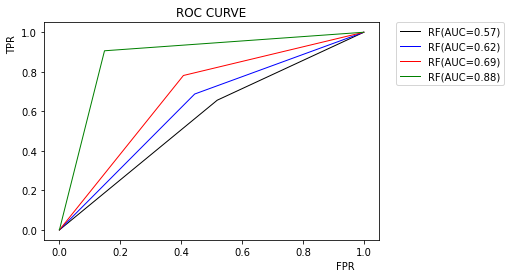

In [4]:
plt.title('ROC CURVE')
#plt.subplot(2,2,1)
plt.plot(RF_FPR[1],RF_TPR[1],'k-',label='RF(AUC={0:.2f})'.format(RF_AUC[1]),lw=1)
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
#plt.title('(a) Model A',y=-0.1)
plt.ylabel('TPR',y=0.9)
plt.xlabel('FPR',x=0.9)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
# plt.figure(2)
#plt.subplot(2,2,2)
plt.plot(RF_FPR[2],RF_TPR[2],'k-',label='RF(AUC={0:.2f})'.format(RF_AUC[2]),lw=1,color='b')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('TPR',y=0.9)
plt.xlabel('FPR',x=0.9)
#plt.title('(b) Model B',y=-0.1)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
# plt.figure(3)
#plt.subplot(2,2,3)
plt.plot(RF_FPR[3],RF_TPR[3],'k-',label='RF(AUC={0:.2f})'.format(RF_AUC[3]),lw=1,color='r')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('TPR',y=0.9)
plt.xlabel('FPR',x=0.9)
#plt.title('(c) Model C',y=-0.1)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
#plt.figure(4)
#plt.subplot(2,2,4)
plt.plot(RF_FPR[4],RF_TPR[4],'k-',label='RF(AUC={0:.2f})'.format(RF_AUC[4]),lw=1,color='g')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('TPR',y=0.9)
plt.xlabel('FPR',x=0.9)
#plt.title('(d) Model D',y=-0.1)
plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show()

# Cross validation

accuracy= [0.75       0.91666667 0.83333333 0.83333333 0.72727273]
AUC of RF is  0.8478009259259259


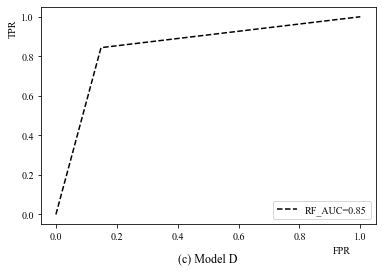

In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn import svm
from sklearn import neighbors
df=pd.read_csv('D:/Lehigh/bussiness/final project/第二次提取特征/PCA降维/密码4.csv',index_col=0)
Data_x=df.iloc[:,0:-1]
Data_y=df.iloc[:,-1]
RF=RandomForestClassifier()
score_RF=cross_val_score(RF,Data_x,Data_y,scoring='accuracy',cv=5)
print('accuracy=',score_RF)
predict_RF=cross_val_predict(RF,Data_x,Data_y,cv=5)
# print(predict_RF==Data_y)
RF_FPR,RF_TPR,RF_THRESHOLDS=roc_curve(y_true=Data_y,y_score=predict_RF,pos_label=1)
# print(RF_FPR,RF_TPR,RF_THRESHOLDS)
RF_AUC=auc(RF_FPR,RF_TPR)
print('AUC of RF is ',RF_AUC)

plt.figure(1)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(RF_FPR,RF_TPR,'k--',label='RF_AUC={0:.2f}'.format(RF_AUC))
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('TPR',y=0.9)
plt.xlabel('FPR',x=0.9)
plt.title('(c) Model D',y=-0.2)
plt.legend(loc="lower right")
plt.show()